<a href="https://colab.research.google.com/github/Vaibhav67979/FCC-Machine-Learning-With-Python/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_do

In [3]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, batch_size=batch_size, shuffle=False, color_mode='rgb', target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, batch_size=batch_size, shuffle=False, color_mode='rgb', target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(PATH, batch_size=1, shuffle=False, color_mode='rgb', target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', classes=['test'],)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


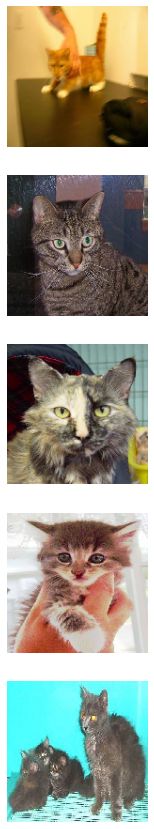

In [4]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
# 5
train_image_generator = ImageDataGenerator(rotation_range=90, width_shift_range=0.2,
    height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,
    vertical_flip=True, rescale=1./255)


Found 2000 images belonging to 2 classes.


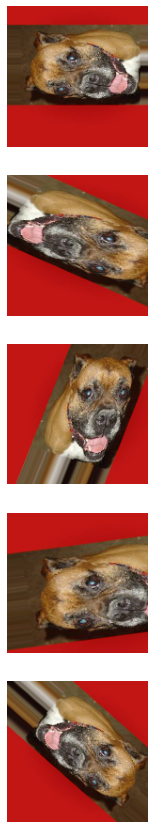

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [7]:
# 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
# Train model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                        

In [12]:
# 8
checkpoint = ModelCheckpoint( filepath='./', monitor='val_acc', verbose=1, save_best_only=True,
                              mode='auto', save_freq='epoch')
history = model.fit(x=train_data_gen, epochs=15, validation_data=val_data_gen, callbacks=[checkpoint])

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 0.5464 - accuracy: 0.7200

16/16 [==============================] - 21s 1s/step - loss: 0.5464 - accuracy: 0.7200 - val_loss: 0.6940 - val_accuracy: 0.5980
Epoch 2/15
16/16 [==============================] - ETA: 0s - loss: 0.5431 - accuracy: 0.7410

16/16 [==============================] - 19s 1s/step - loss: 0.5431 - accuracy: 0.7410 - val_loss: 0.7083 - val_accuracy: 0.6040
Epoch 3/15
16/16 [==============================] - ETA: 0s - loss: 0.5710 - accuracy: 0.6995

16/16 [==============================] - 20s 1s/step - loss: 0.5710 - accuracy: 0.6995 - val_loss: 0.5992 - val_accuracy: 0.6660
Epoch 4/15
16/16 [==============================] - ETA: 0s - loss: 0.5457 - accuracy: 0.7165

16/16 [==============================] - 19s 1s/step - loss: 0.5457 - accuracy: 0.7165 - val_loss: 0.6275 - val_accuracy: 0.6280
Epoch 5/15
16/16 [==============================] - ETA: 0s - loss: 0.5316 - accuracy: 0.7335

16/16 [==============================] - 19s 1s/step - loss: 0.5316 - accuracy: 0.7335 - val_loss: 0.7066 - val_accuracy: 0.6050
Epoch 6/15
16/16 [==============================] - ETA: 0s - loss: 0.5363 - accuracy: 0.7190

16/16 [==============================] - 20s 1s/step - loss: 0.5363 - accuracy: 0.7190 - val_loss: 0.5947 - val_accuracy: 0.6610
Epoch 7/15
16/16 [==============================] - ETA: 0s - loss: 0.5170 - accuracy: 0.7515

16/16 [==============================] - 19s 1s/step - loss: 0.5170 - accuracy: 0.7515 - val_loss: 0.5631 - val_accuracy: 0.7010
Epoch 8/15
16/16 [==============================] - ETA: 0s - loss: 0.5452 - accuracy: 0.7320

16/16 [==============================] - 20s 1s/step - loss: 0.5452 - accuracy: 0.7320 - val_loss: 0.5908 - val_accuracy: 0.6900
Epoch 9/15
16/16 [==============================] - ETA: 0s - loss: 0.5366 - accuracy: 0.7350

16/16 [==============================] - 20s 1s/step - loss: 0.5366 - accuracy: 0.7350 - val_loss: 0.5459 - val_accuracy: 0.7060
Epoch 10/15
16/16 [==============================] - ETA: 0s - loss: 0.5221 - accuracy: 0.7480

16/16 [==============================] - 19s 1s/step - loss: 0.5221 - accuracy: 0.7480 - val_loss: 0.5431 - val_accuracy: 0.7220
Epoch 11/15
16/16 [==============================] - ETA: 0s - loss: 0.5121 - accuracy: 0.7450

16/16 [==============================] - 20s 1s/step - loss: 0.5121 - accuracy: 0.7450 - val_loss: 0.5367 - val_accuracy: 0.7200
Epoch 12/15
16/16 [==============================] - ETA: 0s - loss: 0.4933 - accuracy: 0.7560

16/16 [==============================] - 21s 1s/step - loss: 0.4933 - accuracy: 0.7560 - val_loss: 0.5680 - val_accuracy: 0.6980
Epoch 13/15
16/16 [==============================] - ETA: 0s - loss: 0.5158 - accuracy: 0.7520

16/16 [==============================] - 19s 1s/step - loss: 0.5158 - accuracy: 0.7520 - val_loss: 0.5429 - val_accuracy: 0.7160
Epoch 14/15
16/16 [==============================] - ETA: 0s - loss: 0.5070 - accuracy: 0.7565

16/16 [==============================] - 20s 1s/step - loss: 0.5070 - accuracy: 0.7565 - val_loss: 0.6036 - val_accuracy: 0.6980
Epoch 15/15
16/16 [==============================] - ETA: 0s - loss: 0.4963 - accuracy: 0.7550

16/16 [==============================] - 19s 1s/step - loss: 0.4963 - accuracy: 0.7550 - val_loss: 0.5599 - val_accuracy: 0.7230


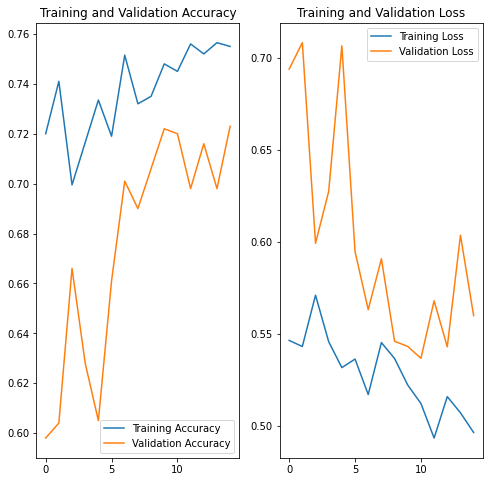

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
probabilities = [int(boolean) for boolean in model.predict(test_data_gen) > 0.5]
print(probabilities)

50/50 [==============================] - 0s 5ms/step
[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1]


In [17]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 76.0% of the images of cats and dogs.
You passed the challenge!
